In [2]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   - -------------------------------------- 1.8/56.8 MB 10.6 MB/s eta 0:00:06
   -- ------------------------------------- 3.4/56.8 MB 8.9 MB/s eta 0:00:06
   --- ------------------------------------ 5.0/56.8 MB 8.2 MB/s eta 0:00:07
   ----- ---------------------------------- 7.3/56.8 MB 9.0 MB/s eta 0:00:06
   ------ --------------------------------- 8.7/56.8 MB 8.5 MB/s eta 0:00:06
   ------- -------------------------------- 10.7/56.8 MB 9.0 MB/s eta 0:00:06
   --------- ------------------------------ 12.8/56.8 MB 8.9 MB/s eta 0:00:05
   --------- ------------------------------ 14.2/56.8 MB 8.6 MB/s eta 0:00:05
   ---------- ----------------------------- 15.5/56.8 MB 8.3 MB/s eta 0:00:05
   ----------- ---------------------------- 17.0/56.8 MB 8.1 MB/s eta 0:00:05
   ------------- -------------------------- 18.6/56.8 MB 8.0 MB/s eta 0:00:05
   -------------- ------------------------- 19.9/56.8 MB 8.0 MB/s eta 0:00:0

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # This will work after installation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("customer_churn_dataset.xlsx")

In [5]:
label_encoders = {}
for col in ["Gender", "ContractType", "PaymentMethod"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [6]:
X = df.drop(["CustomerID", "Churn"], axis=1)
y = df["Churn"]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [10]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [11]:
print("🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

🔹 Logistic Regression Results
Accuracy: 0.72
[[72  0]
 [28  0]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        72
           1       0.00      0.00      0.00        28

    accuracy                           0.72       100
   macro avg       0.36      0.50      0.42       100
weighted avg       0.52      0.72      0.60       100



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [13]:
print("\n🔹 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Results
Accuracy: 0.71
[[68  4]
 [25  3]]
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        72
           1       0.43      0.11      0.17        28

    accuracy                           0.71       100
   macro avg       0.58      0.53      0.50       100
weighted avg       0.65      0.71      0.64       100



In [14]:
importances = rf_model.feature_importances_
features = X.columns
feat_imp = pd.DataFrame({"Feature": features, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

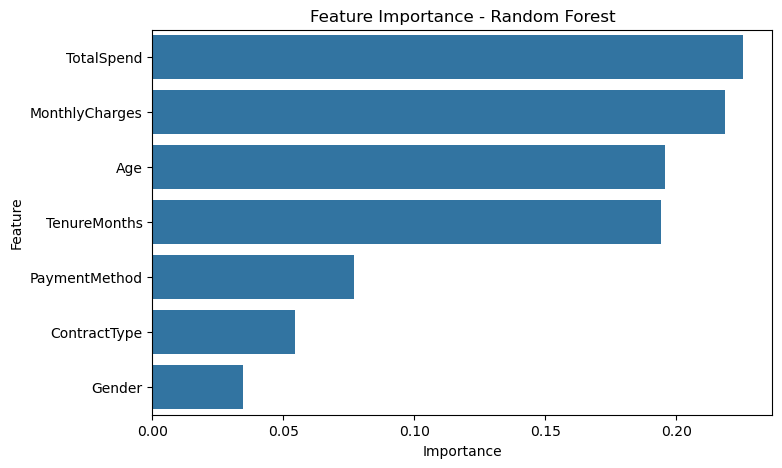

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Feature Importance - Random Forest")
plt.show()

In [16]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:40:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [17]:
print("\n🔹 XGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


🔹 XGBoost Results
Accuracy: 0.66
[[58 14]
 [20  8]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        72
           1       0.36      0.29      0.32        28

    accuracy                           0.66       100
   macro avg       0.55      0.55      0.55       100
weighted avg       0.64      0.66      0.65       100



In [18]:
xgb_importances = xgb_model.feature_importances_
feat_imp_xgb = pd.DataFrame({"Feature": features, "Importance": xgb_importances})
feat_imp_xgb = feat_imp_xgb.sort_values(by="Importance", ascending=False)

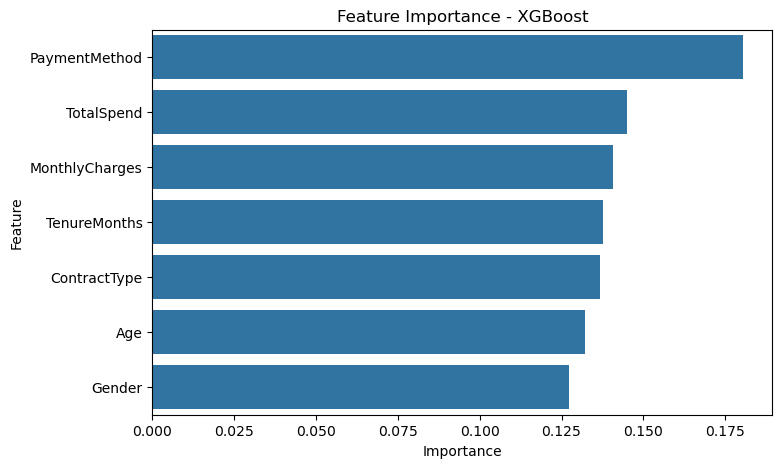

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp_xgb)
plt.title("Feature Importance - XGBoost")
plt.show()